In [1]:
from sklearn.datasets import load_breast_cancer

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

breast_cancer_data = load_breast_cancer()

df_features = breast_cancer_data.feature_names

df_data = pd.DataFrame(breast_cancer_data.data, columns = df_features)

df_labels = pd.DataFrame(breast_cancer_data.target)   

In [2]:
df_data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
print(df_features)
print(df_data)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297

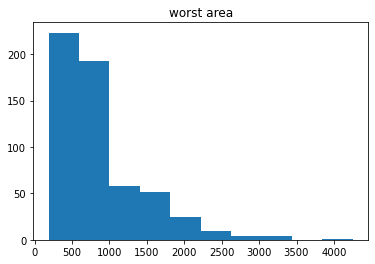

In [4]:
df_data.describe()
plt.hist(df_data['worst area'])
plt.title('worst area')
plt.show()

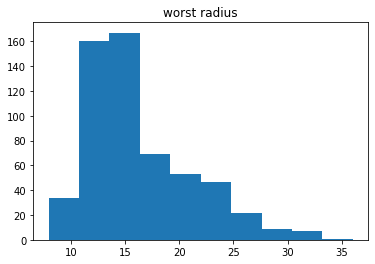

In [5]:
df_data.describe()
plt.hist(df_data['worst radius'])
plt.title('worst radius')
plt.show()

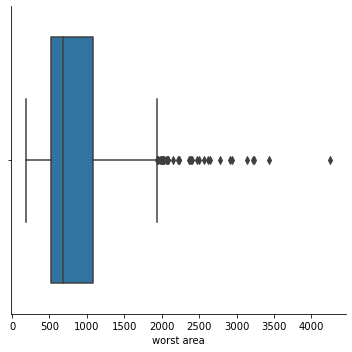

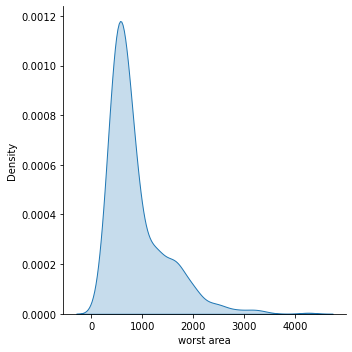

In [6]:
sns.catplot(kind='box',x='worst area',data=df_data)
sns.displot(kind='kde', x='worst area', data=df_data, fill=True)

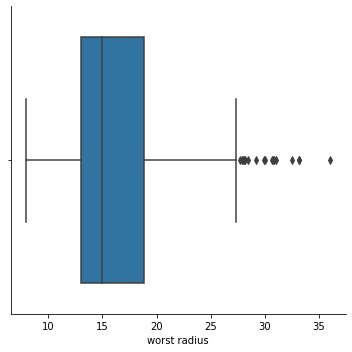

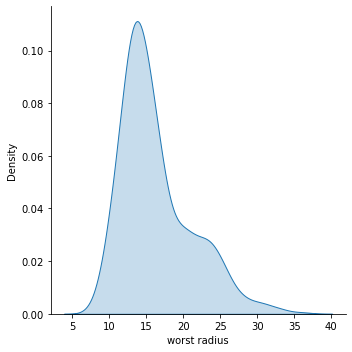

In [7]:
sns.catplot(kind='box',x='worst radius',data=df_data)
sns.displot(kind='kde', x='worst radius', data=df_data, fill=True)

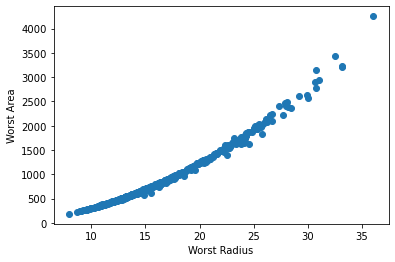

In [8]:
plt.scatter(df_data['worst radius'], df_data['worst area'])
plt.xlabel('Worst Radius')
plt.ylabel('Worst Area')
plt.show()

In [9]:
df_data.isnull()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [11]:
df_data.dropna() #결측값 있는 행 제거
df_data.dropna(axis=1) #결측값 있는 열 제거

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
print(df_data[:10])

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

In [13]:
print(df_labels[0:10])

   0
0  0
1  0
2  0
3  0
4  0
5  0
6  0
7  0
8  0
9  0


In [14]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_labels, test_size = 0.2, random_state=42)

In [16]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (455, 30)
y_train.shape : (455, 1)
X_test.shape: (114, 30)
y_test.shape: (114, 1)


In [17]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

In [18]:
train_scaled = (X_train - mean) / std
test_scaled = (X_test - mean) / std

In [19]:
print(mean)
print(train_scaled)
print(test_scaled)

mean radius                 14.117635
mean texture                19.185033
mean perimeter              91.882242
mean area                  654.377582
mean smoothness              0.095744
mean compactness             0.103619
mean concavity               0.088898
mean concave points          0.048280
mean symmetry                0.181099
mean fractal dimension       0.062757
radius error                 0.402016
texture error                1.202687
perimeter error              2.858253
area error                  40.071299
smoothness error             0.006989
compactness error            0.025635
concavity error              0.032824
concave points error         0.011894
symmetry error               0.020574
fractal dimension error      0.003820
worst radius                16.235103
worst texture               25.535692
worst perimeter            107.103121
worst area                 876.987033
worst smoothness             0.131532
worst compactness            0.252742
worst concav

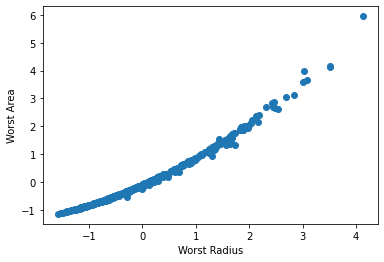

In [20]:
plt.scatter(train_scaled['worst radius'], train_scaled['worst area'])
plt.xlabel('Worst Radius')
plt.ylabel('Worst Area')
plt.show()

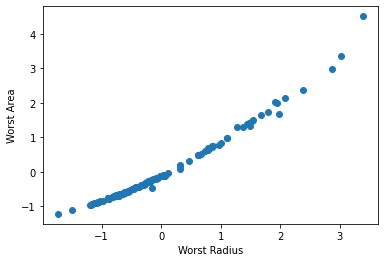

In [30]:
plt.scatter(test_scaled['worst radius'], test_scaled['worst area'])
plt.xlabel('Worst Radius')
plt.ylabel('Worst Area')
plt.show()

In [21]:
mymodel = KNeighborsClassifier(n_neighbors=4)
mymodel.fit(train_scaled, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [22]:
mymodel.score(test_scaled, y_test)

0.956140350877193

In [23]:
b = mymodel.score(test_scaled, y_test)

In [24]:
for n in range(3, 100):
    mymodel.n_neighbors = n
    L_score = mymodel.score(test_scaled, y_test)
    if L_score > b:
        b = L_score
        L_max = n
mymodel.n_neighbors = L_max
L_max_S = mymodel.score(test_scaled, y_test)
print("정확도가 가장 높은 최근접 이웃 개수는 정확도가 %.9f%%인 %d 입니다."%(L_max_S*100, L_max))

정확도가 가장 높은 최근접 이웃 개수는 정확도가 96.491228070%인 9 입니다.


In [25]:
from sklearn.neighbors import KNeighborsClassifier

mymodel = KNeighborsClassifier(n_neighbors=3)
mymodel.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=3)

In [26]:
prediction = mymodel.predict(X_test)
mymodel.score(X_test, y_test)


0.9298245614035088

In [27]:
mymodel = KNeighborsClassifier(n_neighbors=4)
mymodel.fit(X_train, y_train.values.ravel())
prediction = mymodel.predict(X_test)
mymodel.score(X_test, y_test)

0.9385964912280702

In [28]:
a = mymodel.score(X_test, y_test)
for n in range(3, 100):
    mymodel.n_neighbors = n
    score = mymodel.score(X_test, y_test)
    if score > a:
        print(n)
        a = score
        max = n
mymodel.n_neighbors = max
max_S = mymodel.score(X_test, y_test)
print("정확도가 가장 높은 최근접 이웃 개수는 정확도가 %.9f%%인 %d 입니다."%(max_S*100, max))

5
6
10
11
정확도가 가장 높은 최근접 이웃 개수는 정확도가 98.245614035%인 11 입니다.


In [29]:
mymodel.n_neighbors = 11
mymodel.score(X_test, y_test)

0.9824561403508771